In [0]:
import tensorflow as tf
import math
import numpy as np
import os
import matplotlib.pyplot as plt

In [0]:
#gpu_options = tf.GPUOptions(allow_growth = True)
#config=tf.ConfigProto(gpu_options=gpu_options)
#config.gpu_options.per_process_gpu_memory_fraction = 0.34

In [0]:
# Import mnist dataset

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
mnist.train.images.shape

(55000, 784)

In [0]:
# We will train the model with 784 features derived from the shape. The number of digits are ten which is the number of classes. 

In [0]:
n_features = 784
n_classes = 10
batch_size = 100
lr = 0.0001
epochs = 30
error = np.zeros(epochs)

In [0]:
# Initialize the viriables

In [0]:
X = tf.placeholder(tf.float32, [None, n_features])
Y = tf.placeholder(tf.float32)

In [0]:
# Convigure the network

In [0]:
L1 = tf.layers.dense(X, 1024, activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer(), name = 'L1')
L2 = tf.layers.dense(L1, 1024, activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer(), name = 'L2')
L3 = tf.layers.dense(L2, 1024, activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer(), name = 'L3')
L4 = tf.layers.dense(L3, 1024, activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer(), name = 'L4')
L5 = tf.layers.dense(L4, 1024, activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer(), name = 'L5')
Ylogits = tf.layers.dense(L5, n_classes, kernel_initializer= tf.contrib.layers.xavier_initializer(), name = 'Ylogits')
pred = tf.nn.softmax(logits = Ylogits)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# The cell below will compute our cost function

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Ylogits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = lr).minimize(cost)

In [0]:
sess = tf.Session()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

In [0]:
for epoch in range(epochs):
    for _ in range(int(mnist.train.num_examples/batch_size)):
        _x, _y = mnist.train.next_batch(batch_size)
        l, _ = sess.run([cost, optimizer], feed_dict = {X: _x, Y: _y})
        error[epoch] += l
print('Epoch', epochs, ' loss: ', np.round(error[epochs-1],2))

Epoch 30  loss:  2.54


In [0]:
# The last epoch of the the cost function has a loss of 2.54 which is resonably low. Which means our model is reasobly tuned. The cell below
# Will calculate the accuracy level of our model. The accuracy comes to about 98% which is pretty decent.

In [0]:
correct = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
print('Accuracy:',accuracy.eval({X:mnist.test.images, Y:mnist.test.labels}, session = sess))

Accuracy: 0.9807


In [0]:
# Below we save the model for reuse later

In [0]:
saver.save(sess, 'model/mnist_mod')
sess.close()

In [0]:
# Restore the model and pull the values of the weights. 

In [0]:
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, 'model/mnist_mod')

INFO:tensorflow:Restoring parameters from model/mnist_mod


In [0]:
w1 = tf.get_default_graph().get_tensor_by_name(os.path.split(L1.name)[0] + '/kernel:0')
b1 = tf.get_default_graph().get_tensor_by_name(os.path.split(L1.name)[0] + '/bias:0')
w2 = tf.get_default_graph().get_tensor_by_name(os.path.split(L2.name)[0] + '/kernel:0')
b2 = tf.get_default_graph().get_tensor_by_name(os.path.split(L2.name)[0] + '/bias:0')
w3 = tf.get_default_graph().get_tensor_by_name(os.path.split(L3.name)[0] + '/kernel:0')
b3 = tf.get_default_graph().get_tensor_by_name(os.path.split(L3.name)[0] + '/bias:0')
w4 = tf.get_default_graph().get_tensor_by_name(os.path.split(L4.name)[0] + '/kernel:0')
b4 = tf.get_default_graph().get_tensor_by_name(os.path.split(L4.name)[0] + '/bias:0')
w5 = tf.get_default_graph().get_tensor_by_name(os.path.split(L5.name)[0] + '/kernel:0')
b5 = tf.get_default_graph().get_tensor_by_name(os.path.split(L5.name)[0] + '/bias:0')
w_out = tf.get_default_graph().get_tensor_by_name(os.path.split(Ylogits.name)[0] + '/kernel:0')
b_out = tf.get_default_graph().get_tensor_by_name(os.path.split(Ylogits.name)[0] + '/bias:0')

In [0]:
# Using the tensorflow function, we compute the simple value decomposition values of the weights of each network.

In [0]:
s1, u1, v1 = tf.svd(w1)
s2, u2, v2 = tf.svd(w2)
s3, u3, v3 = tf.svd(w3)
s4, u4, v4 = tf.svd(w4)
s5, u5, v5 = tf.svd(w5)

In [0]:
# Using the u and v values of the weights to create a feed forward network to predict the digits.

In [0]:
d = tf.placeholder(tf.int32, shape = (), name = "d")
l1 = tf.nn.relu(tf.add(tf.matmul(tf.multiply(tf.matmul(X, u1[:,:d]), s1[:d]), tf.transpose(v1)[:d,:]), b1))
l2 = tf.nn.relu(tf.add(tf.matmul(tf.multiply(tf.matmul(l1, u2[:,:d]), s2[:d]), tf.transpose(v2)[:d,:]), b2))
l3 = tf.nn.relu(tf.add(tf.matmul(tf.multiply(tf.matmul(l2, u3[:,:d]), s3[:d]), tf.transpose(v3)[:d,:]), b3))
l4 = tf.nn.relu(tf.add(tf.matmul(tf.multiply(tf.matmul(l3, u4[:,:d]), s4[:d]), tf.transpose(v4)[:d,:]), b4))
l5 = tf.nn.relu(tf.add(tf.matmul(tf.multiply(tf.matmul(l4, u5[:,:d]), s5[:d]), tf.transpose(v5)[:d,:]), b5))

logits = l5@w_out +  b_out

svd_pred = tf.nn.softmax(logits = logits)

In [0]:
# Determine the accuracy of the prediction

In [0]:
acc_ = tf.equal(tf.argmax(svd_pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(acc_, 'float'))

In [0]:
# Using different D values, determine the accuracy of the prediction using the new network.

In [0]:
dvalue = [10, 20, 50, 100, 200, 786]
acc = np.zeros(len(dvalue))

for i in range(len(dvalue)):
    acc[i] = sess.run(accuracy, feed_dict = {d: dvalue[i], X:mnist.test.images, Y:mnist.test.labels})

In [0]:
# A plot of the accuracy values vs the D values is as shown below.

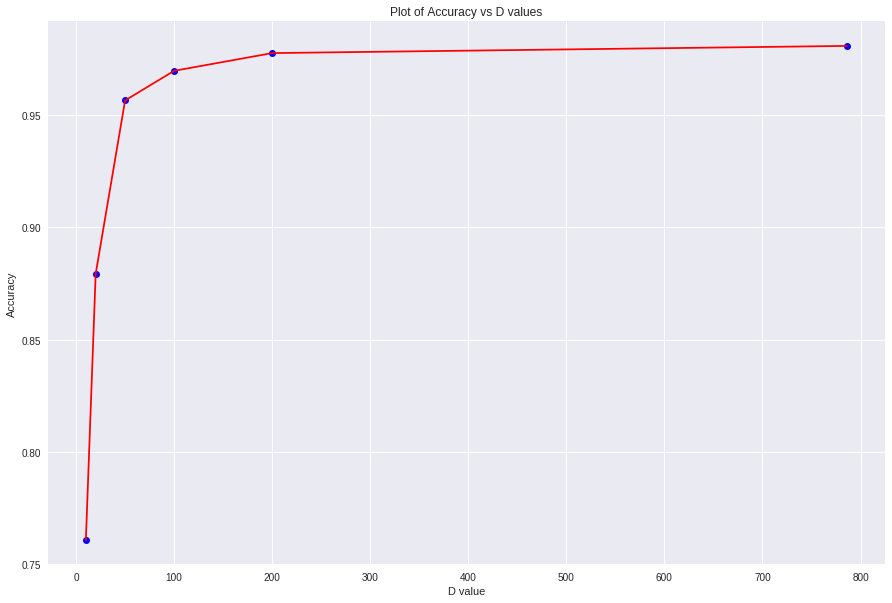

In [0]:
plt.figure(figsize=(15,10))
plt.plot(dvalue, acc, 'bo')
plt.plot(dvalue, acc, 'r-')
plt.xlabel("D value")
plt.ylabel("Accuracy")
plt.title("Plot of Accuracy vs D values")
plt.show()

In [0]:
S1_, U1_, V1_, b1 = sess.run([s1, u1, v1, b1])
S2_, U2_, V2_, b2 = sess.run([s2, u2, v2, b2])
S3_, U3_, V3_, b3 = sess.run([s3, u3, v3, b3])
S4_, U4_, V4_, b4 = sess.run([s4, u4, v4, b4])
S5_, U5_, V5_, b5 = sess.run([s5, u5, v5, b5])

In [0]:
wout, bout = sess.run([w_out, b_out])

In [0]:
# Fine tune the network for a fixed value of D = 20

In [0]:
d_new = 20

V1 = tf.Variable((S1_[:d_new]*V1_[:, :d_new]).T, name = 'V1')
U1 = tf.Variable(U1_[:,:20], name = 'U1')
B1 = tf.Variable(b1, name = 'B1')

In [0]:
V2 = tf.Variable((S2_[:d_new]*V2_[:, :d_new]).T, name = 'V2')
U2 = tf.Variable(U2_[:,:20], name = 'U2')
B2 = tf.Variable(b2, name = 'B2')

In [0]:
V2 = tf.Variable((S2_[:d_new]*V2_[:, :d_new]).T, name = 'V2')
U2 = tf.Variable(U2_[:,:20], name = 'U2')
B2 = tf.Variable(b2, name = 'B2')

In [0]:
V3 = tf.Variable((S3_[:d_new]*V3_[:, :d_new]).T, name = 'V3')
U3 = tf.Variable(U3_[:,:20], name = 'U3')
B3 = tf.Variable(b3, name = 'B3')

In [0]:
V4 = tf.Variable((S4_[:d_new]*V4_[:, :d_new]).T, name = 'V4')
U4 = tf.Variable(U4_[:,:20], name = 'U4')
B4 = tf.Variable(b4, name = 'B4')

In [0]:
V5 = tf.Variable((S5_[:d_new]*V5_[:, :d_new]).T, name = 'V5')
U5 = tf.Variable(U5_[:,:20], name = 'U5')
B5 = tf.Variable(b5, name = 'B5')

In [0]:
weight_out = tf.Variable(wout, name = 'weight_out')
biases_out = tf.Variable(bout, name = 'biases_out')

In [0]:
variables_list = [V1, U1, V2, U2, V3, U3, V4, U4, V5, U5, B1, B2, B3, B4, B5, weight_out, biases_out]
init_values = tf.variables_initializer(var_list=variables_list)

In [0]:
sess.run(init_values)

In [0]:
L1 = tf.nn.relu(tf.add(tf.matmul(X,(tf.matmul(U1,V1))), B1))
L2 = tf.nn.relu(tf.add(tf.matmul(L1,(tf.matmul(U2,V2))), B2))
L3 = tf.nn.relu(tf.add(tf.matmul(L2,(tf.matmul(U3,V3))), B3))
L4 = tf.nn.relu(tf.add(tf.matmul(L3,(tf.matmul(U4,V4))), B4))
L5 = tf.nn.relu(tf.add(tf.matmul(L4,(tf.matmul(U5,V5))), B5))

svd_logit = L5@weight_out +  biases_out

svd_pred = tf.nn.softmax(logits = svd_logit)

In [0]:
lr_svd = 0.00001

In [0]:
t_var = set(tf.global_variables())
cost_ = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = svd_logit, labels = Y))
optimizer_ = tf.train.AdamOptimizer(learning_rate = lr_svd).minimize(cost_)
sess.run(tf.variables_initializer(set(tf.global_variables()) - t_var))

In [0]:
epochs = 20
error_ = np.zeros(epochs)
for epoch in range(epochs):
    for _ in range(int(mnist.train.num_examples/batch_size)):
        _x, _y = mnist.train.next_batch(batch_size)
        l, _ = sess.run([cost_, optimizer_], feed_dict = {X: _x, Y: _y})
        error_[epoch] += l

    print('Epoch', epoch+1, ' loss: ', np.round(error_[epoch],2))

Epoch 1  loss:  134.28
Epoch 2  loss:  76.14
Epoch 3  loss:  61.17
Epoch 4  loss:  54.22
Epoch 5  loss:  49.4
Epoch 6  loss:  45.64
Epoch 7  loss:  42.65
Epoch 8  loss:  39.87
Epoch 9  loss:  37.63
Epoch 10  loss:  35.71
Epoch 11  loss:  33.62
Epoch 12  loss:  32.2
Epoch 13  loss:  30.68
Epoch 14  loss:  29.33
Epoch 15  loss:  28.02
Epoch 16  loss:  26.89
Epoch 17  loss:  25.92
Epoch 18  loss:  24.79
Epoch 19  loss:  24.02
Epoch 20  loss:  23.1


In [0]:
acc__new = tf.equal(tf.argmax(svd_pred, 1), tf.argmax(Y, 1))
accuracy_new = tf.reduce_mean(tf.cast(acc__new, 'float'))

In [0]:
acc = sess.run(accuracy_new, feed_dict = {X:mnist.test.images, Y:mnist.test.labels})
print('Accuracy: ', acc)

Accuracy:  0.9737


In [0]:
# The initial value of D produced a very low accuracy. A fine tuned version was considerably higher and closer to the baseline.

In [0]:
sess.close()